<a href="https://colab.research.google.com/github/stanislavfort/hilbert-curves/blob/main/Generating_2D_Hilbert_curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating 2D Hilbert curves

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Rotation definition

In [14]:
def apply_rotation(forward_vector, amount):
  assert amount in [-1,1]
  return amount*np.array([(-1)*forward_vector[1], forward_vector[0]])

In [15]:
def draw_2d_string(s):
  position = np.array([0,0])
  logged_positions = [position]

  forward_vector = np.array([1,0])

  fn_dict = {
      "+": lambda v: apply_rotation(v,-1),
      "-": lambda v: apply_rotation(v,+1),
  }

  for c in s:
    if c in ["+","-"]:
      forward_vector = fn_dict[c](forward_vector)
    elif c in ["F"]:
      position = position + forward_vector
      logged_positions.append(position)
    elif c in ["A","B"]:
      pass
    else:
      assert False

  return logged_positions

## L-system rule application

In [16]:
def apply_l_system_rules(input_string, rules):
    transformed = [rules.get(symbol, symbol) for symbol in input_string]
    return ''.join(transformed)

def iteratively_apply_l_system_rules(input_string, rules, N):
    for _ in range(N):
      input_string = apply_l_system_rules(input_string, rules)
    return input_string

## 2D Hilbert curve

### Generating the curve

In [17]:
rules_2d_hilbert = {
    "A": "+BF-AFA-FB+",
    "B": "-AF+BFB+FA-",
}

n = 3 # order of the Hilbert curve
s = iteratively_apply_l_system_rules("A",rules_2d_hilbert,n)

print(f"2D Hilbert curve of order={n}: {s}")

2D Hilbert curve of order=3: +-+BF-AFA-FB+F+-AF+BFB+FA-F-AF+BFB+FA-+F+BF-AFA-FB+-F-+-AF+BFB+FA-F-+BF-AFA-FB+F+BF-AFA-FB+-F-AF+BFB+FA-+F+-AF+BFB+FA-F-+BF-AFA-FB+F+BF-AFA-FB+-F-AF+BFB+FA-+-F-+BF-AFA-FB+F+-AF+BFB+FA-F-AF+BFB+FA-+F+BF-AFA-FB+-+


### Plotting

In [18]:
def plot_2d_string(s,title=""):

  points = np.stack(draw_2d_string(s), axis=0)

  # Extract x, y, and z coordinates
  xs = points[:, 0]
  ys = points[:, 1]

  # Set up a 3D plot
  plt.title(title)

  # Plot the curve line segment by line segment
  for i in range(len(xs)-1):
    plt.plot([xs[i],xs[i+1]], [ys[i],ys[i+1]], color=plt.cm.brg(i/len(xs)))#,marker="o",markersize=5)

  plt.xticks([],[])
  plt.yticks([],[])

  plt.show()

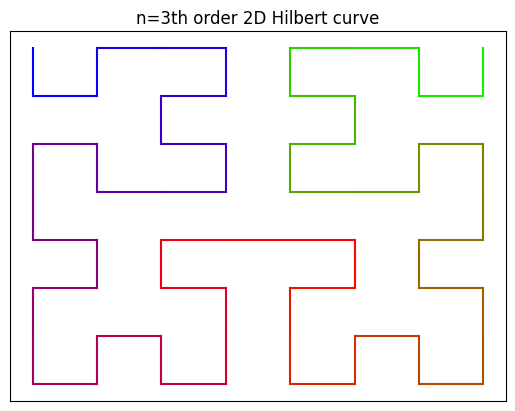

In [20]:
plot_2d_string(s,title=f"n={n}th order 2D Hilbert curve")

### Plotting a series of them

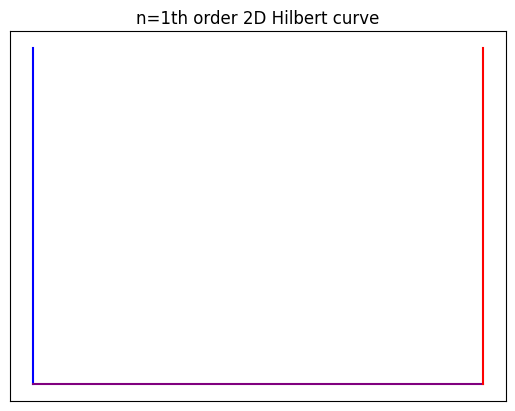

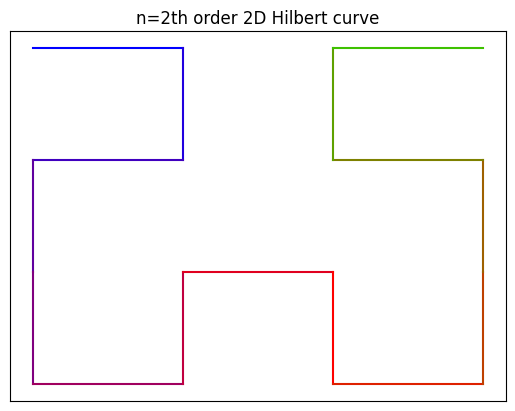

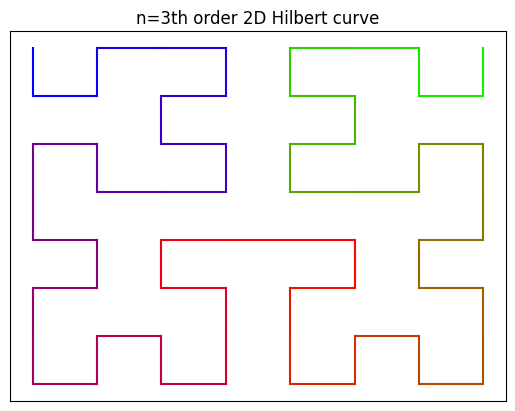

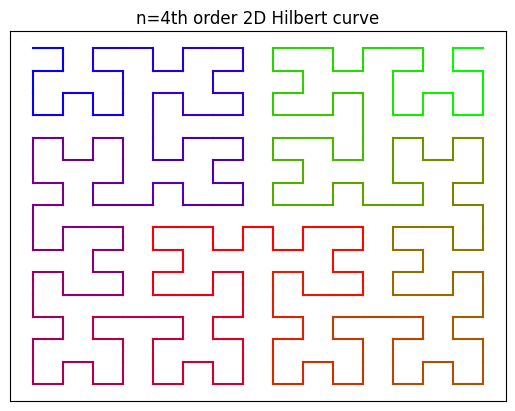

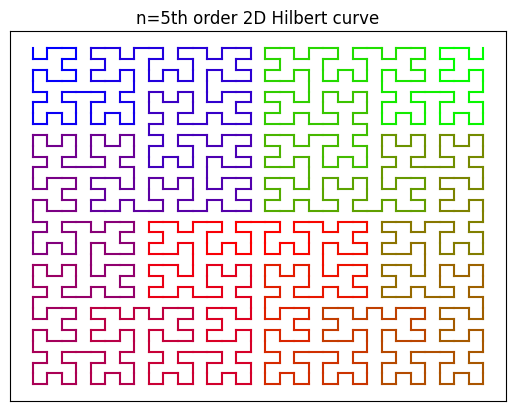

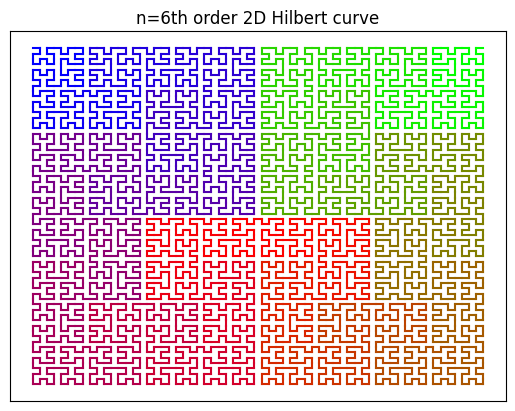

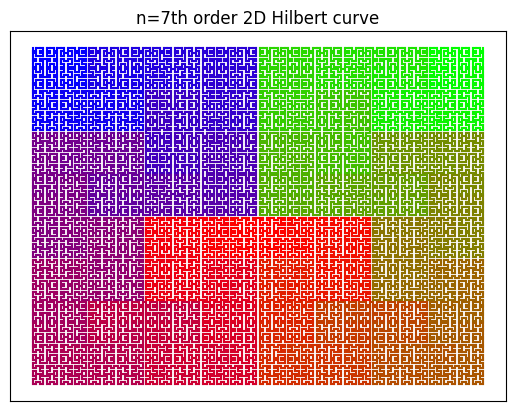

In [22]:
for n in range(1,8):
  s = iteratively_apply_l_system_rules("A",rules_2d_hilbert,n)
  plot_2d_string(s, title=f"n={n}th order 2D Hilbert curve")